# Spike Count Analyses

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve

In [2]:
dset = xr.load_dataset("../../data/steinmetz_2016-12-14_Cori.nc")

cols = ['spike_trial', 'spike_cell', 'spike_time']
spike_times_df = dset[cols].to_dataframe().reset_index()

brain_region_df = dset["brain_area"].to_dataframe().reset_index()
brain_region_df = brain_region_df.rename(columns={"cell": "spike_cell"})

df = pd.merge(spike_times_df, brain_region_df)
df

,spike_id,spike_trial,spike_cell,spike_time,brain_area
0,1,21,1,0.267635,ACA
1,2,21,1,2.308335,ACA
2,3,31,1,0.853476,ACA
3,4,37,1,2.197501,ACA
4,5,43,1,2.452692,ACA
...,...,...,...,...,...
2446168,2446169,364,734,0.266459,DG
2446169,2446170,364,734,0.587060,DG
2446170,2446171,364,734,0.618560,DG
2446171,2446172,364,734,2.188634,DG


##### Create a strip plot to show the distribution of population spike counts for each brain region across all trials

<Axes: xlabel='brain_area', ylabel='population_spike_count'>

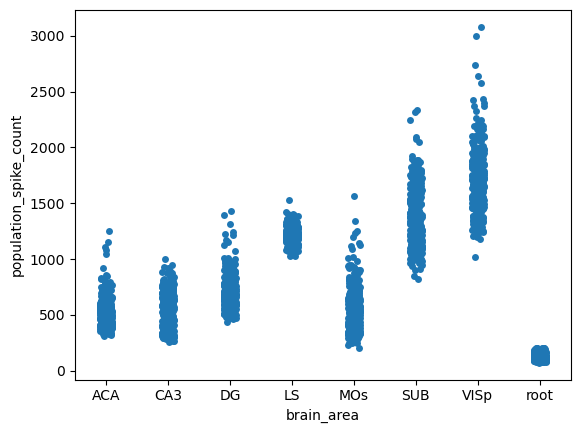

In [3]:
pop_spike_count_df = df.groupby(["spike_trial", "brain_area"]).apply(len).reset_index(name="population_spike_count")
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count")

##### Create a boxen plot for the same data

<Axes: xlabel='brain_area', ylabel='population_spike_count'>

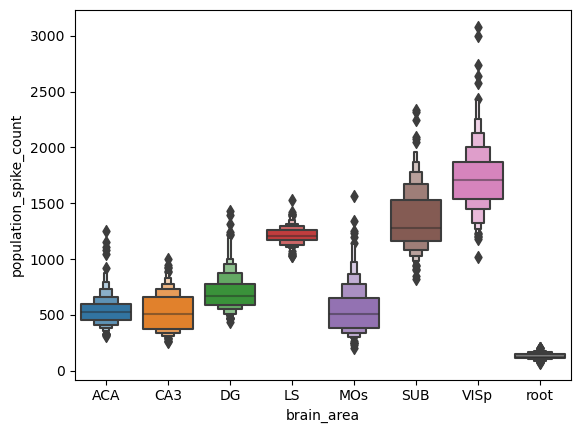

In [4]:
sns.boxenplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count")

##### Overlay the strip plot and the boxen plot in the same plot.

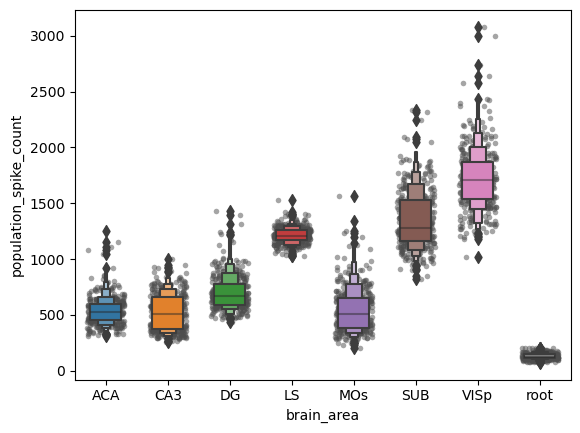

In [5]:
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", size=4, color=".3", alpha=.5, jitter=.3, zorder=0)
ax = sns.boxenplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", width=.5)

##### Does the distribution change when conditioned on correct vs wrong trials?

In [6]:
cols = ["active_trials", "feedback_type"]
active_trials_df = dset[cols].to_dataframe().reset_index()
active_trials_df = active_trials_df.rename(columns={"trial": "spike_trial"})
pop_spike_count_df = pop_spike_count_df.merge(active_trials_df)
pop_spike_count_df = pop_spike_count_df[pop_spike_count_df.active_trials]
pop_spike_count_df

,spike_trial,brain_area,population_spike_count,active_trials,feedback_type
0,1,ACA,676,True,1.0
1,1,CA3,754,True,1.0
2,1,DG,566,True,1.0
3,1,LS,1185,True,1.0
4,1,MOs,455,True,1.0
...,...,...,...,...,...
1707,214,LS,1267,True,-1.0
1708,214,MOs,538,True,-1.0
1709,214,SUB,1377,True,-1.0
1710,214,VISp,1845,True,-1.0


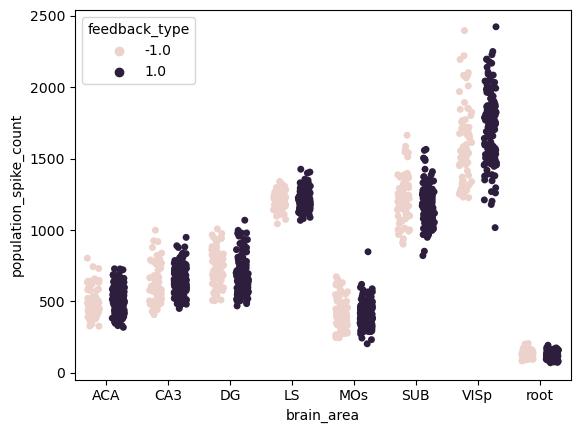

In [7]:
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", dodge=True, jitter=.2);

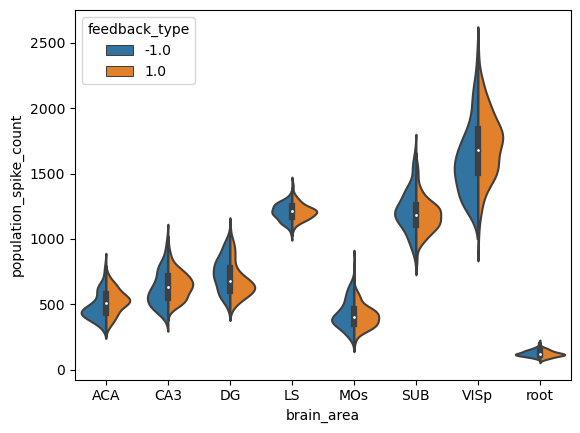

In [8]:
sns.violinplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", split=True);

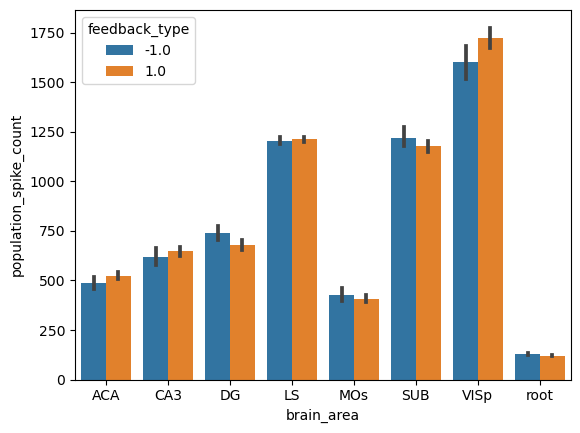

In [9]:
sns.barplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", errorbar=('ci', 99));

##### How does the result change when looking at area groups?

In [10]:
cols = ["brain_area", "brain_groups"]
brain_area_groups_df = dset[cols].to_dataframe().drop_duplicates().reset_index(drop=True)
pop_spike_count_df = pop_spike_count_df.merge(brain_area_groups_df)

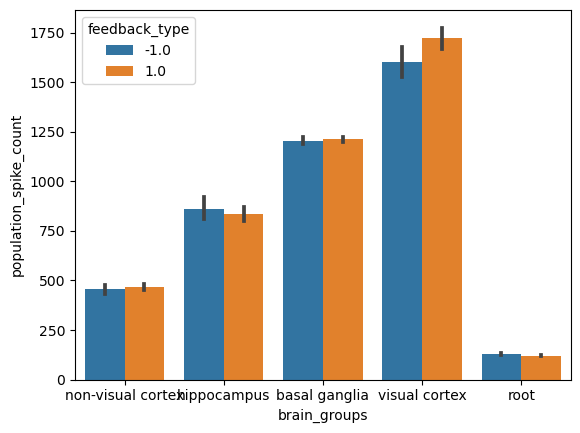

In [11]:
sns.barplot(data=pop_spike_count_df, x="brain_groups", y="population_spike_count", hue="feedback_type", errorbar=("ci", 99));

##### Create a figure with two panels where one panels shows the distribution of spikes across multiple areas for when the mouse was rewarded, and the other panel when the mouse was not rewarded.

##### Save the figure as a pdf file